In [137]:
import pandas as pd 
from sklearn.datasets import load_iris

data = load_iris()
data.__dir__()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [138]:
df = pd.DataFrame(data.data, columns= data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [139]:
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [140]:
df['flower'] = df['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [141]:
df['flower'].replace([0,1,2], ['setosa','versicolor','virginica'], inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [142]:
setosa = df[df['target']==0]
versicolor = df[df['target']==1]
virginica = df[df['target']==2]

Text(0, 0.5, 'sepal width')

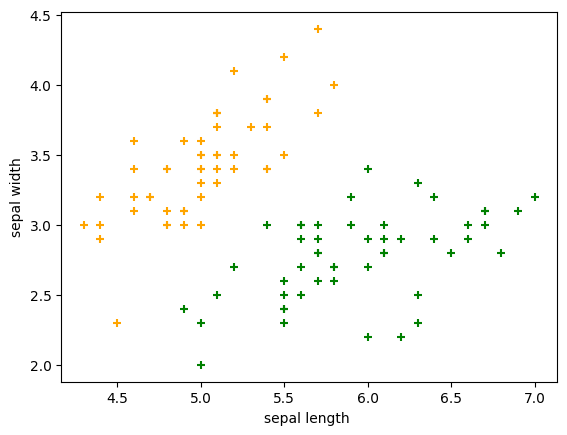

In [143]:
from matplotlib import pyplot as plt 

plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker= '+', color = 'orange')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], marker= '+', color = 'g')
plt.xlabel('sepal length ')
plt.ylabel('sepal width')

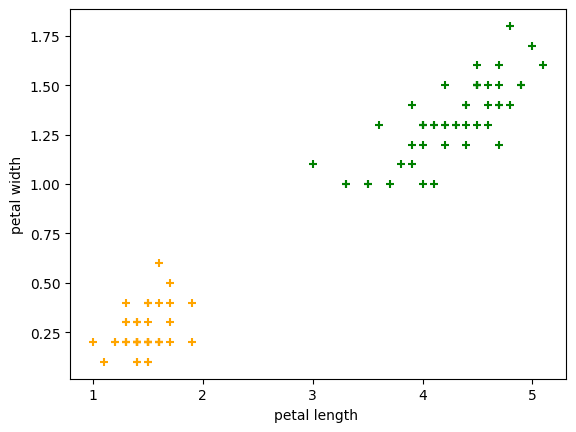

In [144]:
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], marker= '+', color = 'orange')
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], marker= '+', color = 'g')
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.show()

In [145]:
categorical_features = df.drop(['target','flower'], axis=1)
target = df['target']

In [146]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(categorical_features, target)

In [147]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [148]:
svm.score(x_test, y_test)

0.9473684210526315

In [149]:
svm.predict(x_test)

array([0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1])

In [150]:
svm_c = SVC(C = 50)
svm_c

SVC(C=50)

In [151]:
svm_c.fit(x_train, y_train)
svm_c.score(x_test, y_test)

0.9473684210526315

In [155]:
svm_g = SVC(gamma= 1)
svm_g

SVC(gamma=1)

In [156]:
svm_g.fit(x_train, y_train)
svm_g.score(x_test, y_test)

0.9473684210526315

In [157]:
svm_k = SVC(kernel =  'linear')
svm_k.fit(x_train, y_train)
svm_k.score(x_test, y_test)

0.9473684210526315